## An example of multiple-objective optimization

### Use  MOEADSearcher optimize metric 'logloss' and 'elapsed'

In [4]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from hypergbm import HyperGBM
from hypergbm.search_space import search_space_general
from hypergbm.tests import test_output_dir
from hypernets.core.callbacks import *
from hypernets.searchers.moead_searcher import MOEADSearcher
from hypernets.tabular.datasets import dsutils


objectives=['logloss', 'elapsed']

rs = MOEADSearcher(search_space_general, objectives=objectives)

hk = HyperGBM(rs, task='binary', reward_metric='logloss',
              callbacks=[SummaryCallback(), FileLoggingCallback(rs, output_dir=f'{test_output_dir}/hyn_logs')])

df = dsutils.load_bank()
df.drop(['id'], axis=1, inplace=True)
X_train, X_test = train_test_split(df, test_size=0.8, random_state=42)

y_train = X_train.pop('y')
y_test = X_test.pop('y')

hk.search(X_train, y_train, X_test, y_test, max_trials=100)

###  Plot pareto front

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


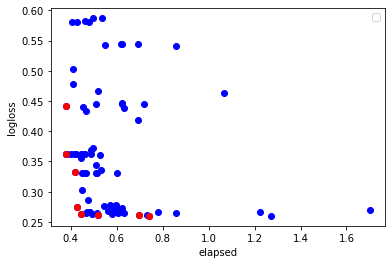

In [5]:
import matplotlib.pyplot as plt

for trial in hk.history.trials:
    plt.scatter([trial.elapsed], [trial.reward], c='blue') # , label='dominated'

pf = rs.get_pf()

for optimal in pf:
    plt.scatter([optimal[1][objectives[0]]], [optimal[1][objectives[1]]], c='red') # , label='pf'

plt.xlabel('elapsed')
plt.ylabel('logloss')

# plt.legend()
plt.show()